# Numerical solutions of first-order systems

Consider the first-order (coupled) system of first-order ODEs
\begin{align*}
    \frac{dy}{dt} &= f(y,z,t),\\
    \frac{dz}{dt} &= g(y,z,t)
\end{align*}
for the unknown functions $y(t)$ and $z(t)$. The familiar function ``odeint`` from ``scipy.integrate`` can be used to solve such systems numerically.

## The Volterra predator-prey model

Consider two populations (one predator species and one prey species) coexisting in an environment. Let the population of prey at time $t$ be denoted $y(t)$ and let the population of predators at time $t$ be denoted $z(t)$. The Volterra (or Lotka–Volterra) predator-prey model makes several simplifying assumptions about the population dynamics:

- In the absence of any predators, the population of prey would grow exponentially, that is, at a rate which is proportional to the current population, with constant of proportionality $a$, say.

- In the absence of any prey on which to feed, the population of predators would decay exponentially, that is, at a rate which is proportional to the current population, with constant of proportionality $b$, say.

- The growth rate of the prey population also contains a term which is proportional to the frequency of interactions between predators and prey, and hence is proportional to $yz$, with constant of proportionality $-p$, say. The more frequent the interactions between predator and prey, the smaller the growth of the prey population.

- The growth rate of the predator population also contains a term which is proportional to the frequency of interactions between predators and prey and hence is proportional to $yz$, with constant of proportionality $q$, say. The more frequent the interactions between predator and prey, the larger the growth of the predator population.

These assumptions lead us to the model
\begin{align*}
    \frac{dy}{dt} &= y(a - pz), \\
    \frac{dz}{dt} &= z(-b + qy),
\end{align*}
where $a,b,p,q$ are positive constants.

**Example 11.1.** Suppose the populations of cheetahs and gazelles obey the Volterra equations with parameters $a=1.1$, $b=0.4$, $p=0.04$, $q=0.01$ and the initial populations consisted of 100 cheetahs and 100 gazelles, with time measured in years. We can use `odeint` to plot the changing populations of cheetahs and gazelles over time as follows:

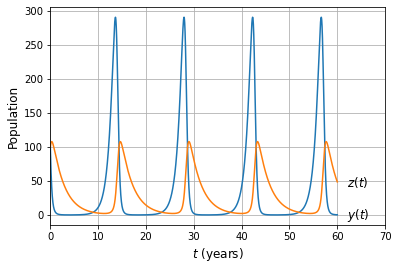

In [1]:
import math
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
%matplotlib inline

def dU_dt(U, t):
    a = 1.1
    b = 0.4
    p = 0.04
    q = 0.01
    
    y = U[0]
    z = U[1]
    dy_dt = y*(a - p*z)
    dz_dt = z*(-b + q*y)
    
    return (dy_dt, dz_dt)

y0 = 100
z0 = 100
U0 = (y0, z0)

t_range = (0, 60)
plt.grid(True)
plt.xlabel('$t$ (years)', fontsize = 12)
plt.ylabel('Population', fontsize = 12)

h = 0.01
t = np.arange(t_range[0], t_range[1] + h, h)
U = odeint(dU_dt, U0, t) # returns (y0, z0), (y1, z1), (y2, z2), ...
y = U[:,0]
z = U[:,1]
plt.plot(t, y)
plt.plot(t, z)

margin = 2
padding = 10
plt.text(t_range[1]+margin, y[-1],'$y(t)$', fontsize = 12, va = 'center')
plt.text(t_range[1]+margin, z[-1],'$z(t)$', fontsize = 12, va = 'center')
plt.xlim(t_range[0], t_range[1]+padding)

plt.show()

Observe that both populations are periodic.

# Numerical solutions of second-order equations

The function `oddeint` can also be used to solve second-order ODEs numerically. To do this, we note that the general second-order equation
$$
    \frac{d^2y}{dt^2}=G(y',y,t)
$$
for the unknown function $y(t)$ can be re-written as the coupled system
\begin{align*}
    \frac{dy}{dt}&=z,\\
    \frac{dz}{dt}&=G(y,z,t)
\end{align*}
for the unknown functions $y(t)$ and $z(t)$.

**Example 11.2.** We can plot the numerical solution to the initial value problem
$$
    \frac{d^2y}{dt^2}=-\frac{2}{t}\frac{dy}{dt}+\frac{1}{t}-1, \hspace{10mm} y(1)=2,\hspace{5mm} y'(1)=1
$$
on the interval $[1,4]$ by re-writing it as the system
\begin{align*}
    \frac{dy}{dt}&=z,\\
    \frac{dz}{dt}&=-\frac{2}{t}z+\frac{1}{t}-1
\end{align*}
with initial conditions $y(1)=2$ and $z(1)=1$.

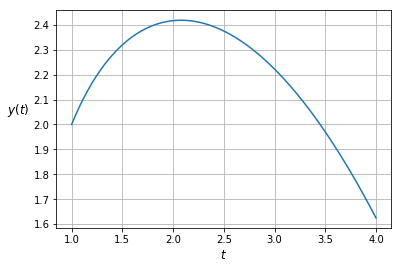

In [2]:
def dU_dt(U, t):
    y = U[0]
    z = U[1]
    dy_dt = z
    dz_dt = - 2/t*z + 1/t - 1
    return (dy_dt, dz_dt)

y0 = 2
z0 = 1
U0 = (y0, z0)

t_range = (1, 4)
plt.grid(True)
plt.xlabel('$t$', fontsize = 12)
plt.ylabel('$y(t)$', fontsize = 12, labelpad=15).set_rotation(0)

h = 0.01
t = np.arange(t_range[0], t_range[1] + h, h)
U = odeint(dU_dt, U0, t)
y = U[:,0]
plt.plot(t, y)

plt.show()